In [2]:
import control as ct
from control.matlab import *

In [3]:
P = ct.tf([2.5, 0, 1, 0], [1, 0, 4.25, 0, 1], name="P"); print(P)

<TransferFunction>: P
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   2.5 s^3 + s
------------------
s^4 + 4.25 s^2 + 1



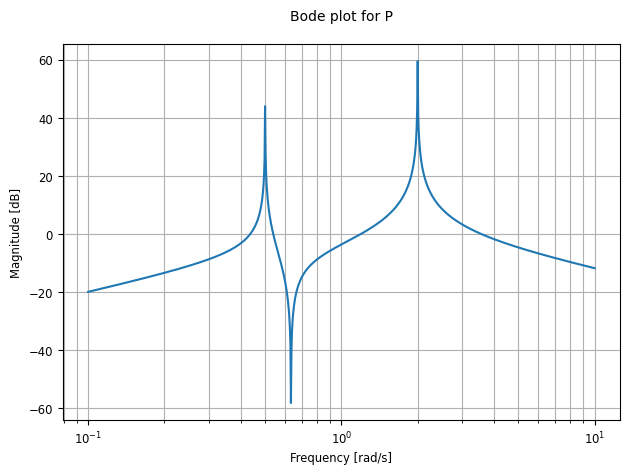

In [93]:
ct.bode(P, plot_phase=0)

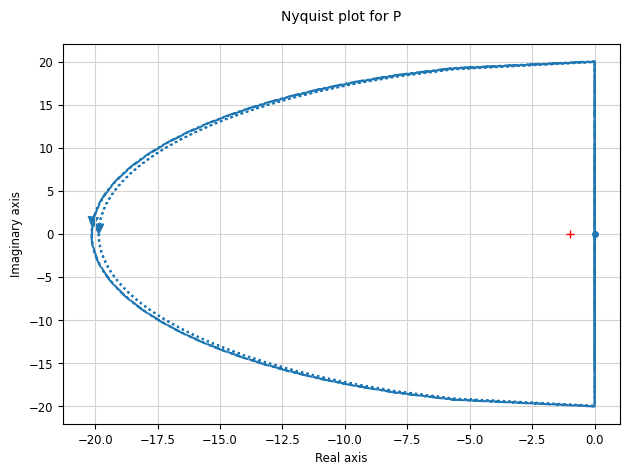

In [78]:
ct.nyquist(P)

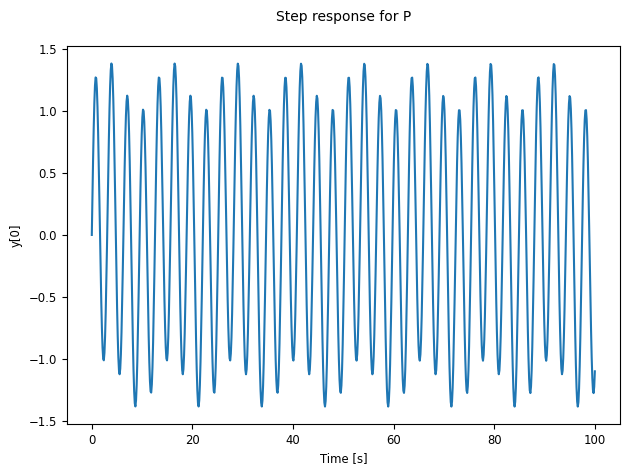

In [45]:
ct.step_response(P, T=100).plot()

In [82]:
Gyd = ct.feedback(P, 1, sign=-1, name="Gyd"); print(Gyd)

<TransferFunction>: Gyd
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


          2.5 s^3 + s
--------------------------------
s^4 + 2.5 s^3 + 4.25 s^2 + s + 1



In [83]:
poles(Gyd)

array([-1.20211727+1.51928969j, -1.20211727-1.51928969j,
       -0.04788273+0.51394312j, -0.04788273-0.51394312j])

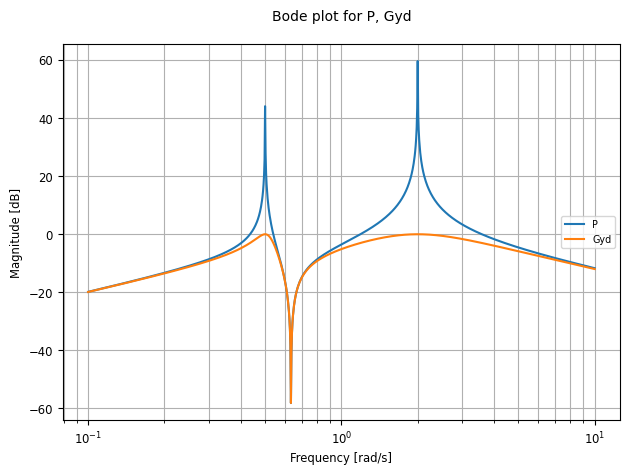

In [95]:
ct.bode([P, Gyd], plot_phase=0)

<TransferFunction>: S1
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


       s^4 + 4.25 s^2 + 1
--------------------------------
s^4 + 2.5 s^3 + 4.25 s^2 + s + 1



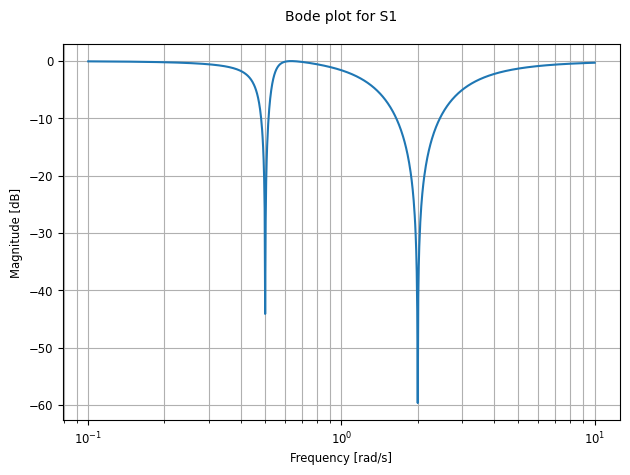

In [94]:
S1 = ct.feedback(1, P, sign=-1, name="S1"); print(S1); ct.bode(S1, plot_phase=0)

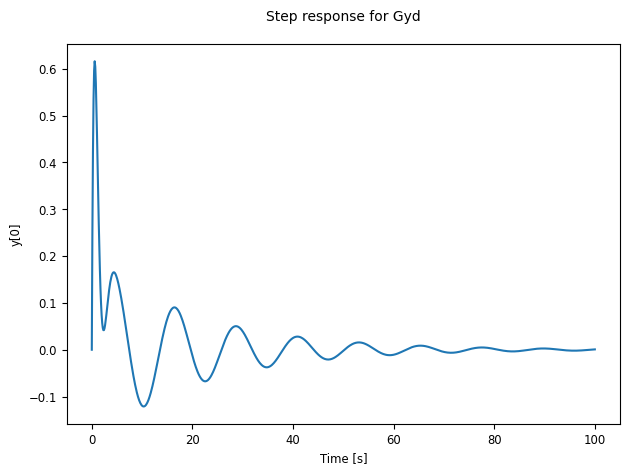

In [49]:
ct.step_response(Gyd,T=100).plot()

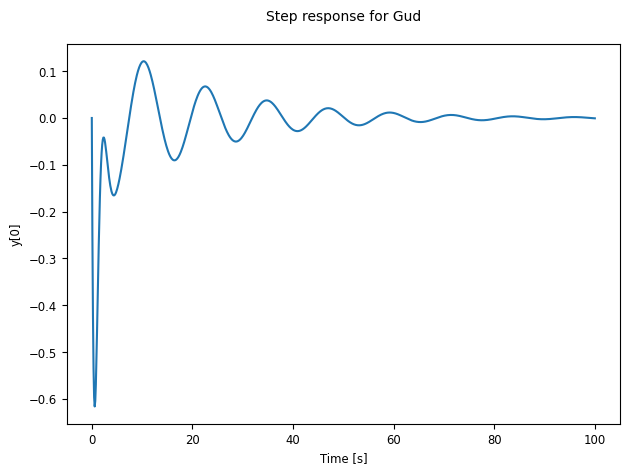

In [52]:
Gud = ct.series(-1, Gyd, name="Gud"); ct.step_response(Gud, T=100).plot()

In [96]:
K1 = ct.tf([1,5], [1, 0], name="K1"); GydK1 = ct.feedback(P, K1, sign=-1, name="GydK1"); print(GydK1); print(K1)

<TransferFunction>: GydK1
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


            2.5 s^4 + s^2
-------------------------------------
s^5 + 2.5 s^4 + 16.75 s^3 + s^2 + 6 s

<TransferFunction>: K1
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


s + 5
-----
  s



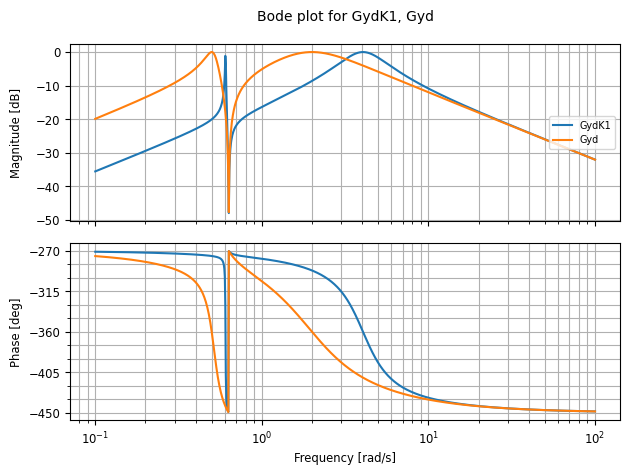

In [71]:
ct.bode([GydK1, Gyd])

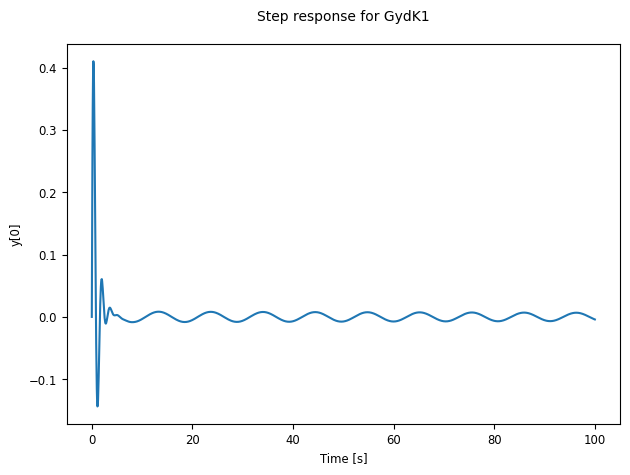

In [72]:
ct.step_response(GydK1, T=100).plot()

<TransferFunction>: GudK1
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   2.5 s^4 + 12.5 s^3 + s^2 + 5 s
-------------------------------------
s^5 + 2.5 s^4 + 16.75 s^3 + s^2 + 6 s



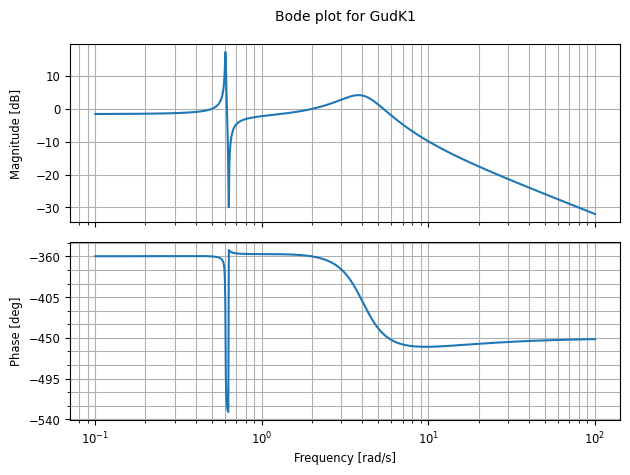

In [84]:
GudK1 = ct.feedback(ct.series(P, K1), 1, sign=-1, name="GudK1"); print(GudK1); ct.bode(GudK1)

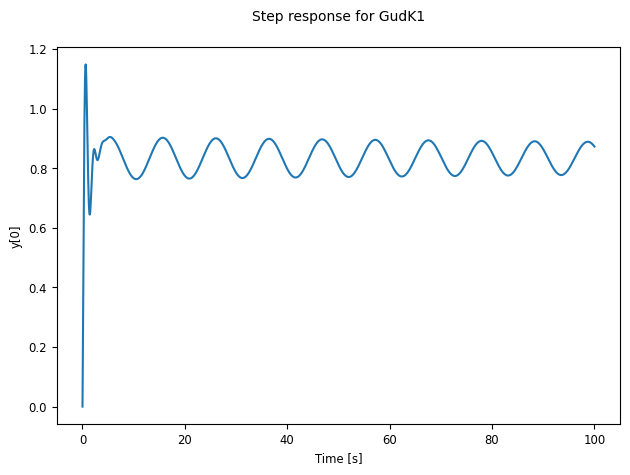

In [74]:
ct.step_response(GudK1, T=100).plot()

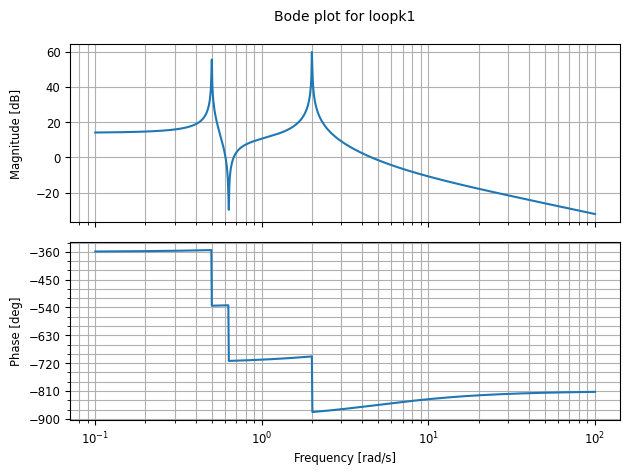

In [75]:
loopk1 = ct.series(P, K1, name="loopk1"); ct.bode(loopk1)

/home/hongbin/.pyenv/versions/3.10.14/lib/python3.10/site-packages/control/freqplot.py:1786: UserWarning: indented contour may miss closed loop pole; consider reducing indent_radius to below     0
  nyquist_responses = nyquist_response(
/home/hongbin/.pyenv/versions/3.10.14/lib/python3.10/site-packages/control/freqplot.py:1786: UserWarning: number of encirclements does not match Nyquist criterion; check frequency range and indent radius/direction
  nyquist_responses = nyquist_response(


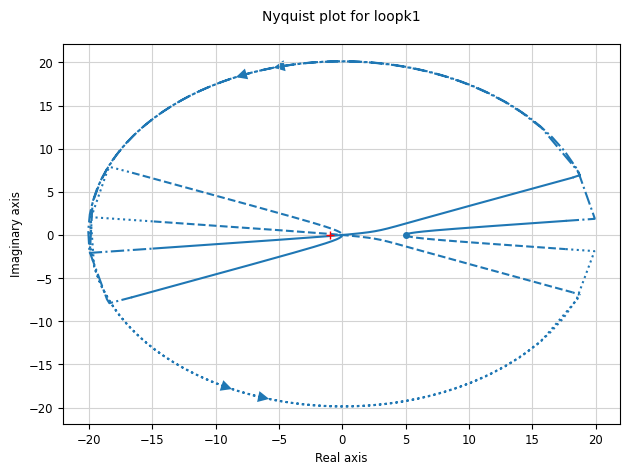

In [79]:
ct.nyquist(loopk1)

In [81]:
ct.poles(GydK1)

array([-1.24738458+3.84895669j, -1.24738458-3.84895669j,
       -0.00261542+0.60539865j, -0.00261542-0.60539865j,
        0.        +0.j        ])

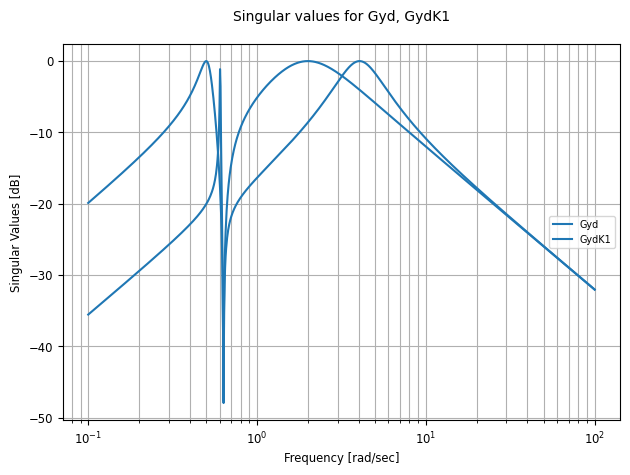

In [85]:
ct.singular_values_plot([Gyd, GydK1])

<TransferFunction>: Sk1
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


         s^5 + 4.25 s^3 + s
-------------------------------------
s^5 + 2.5 s^4 + 16.75 s^3 + s^2 + 6 s



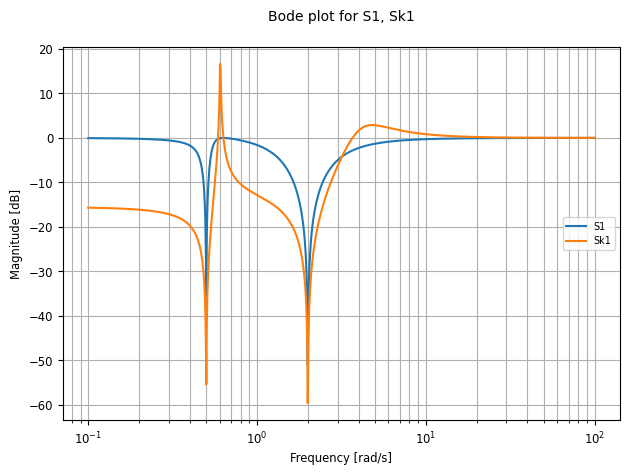

In [98]:
Sk1 = ct.feedback(1, loopk1, sign=-1, name="Sk1"); print(Sk1); ct.bode([S1, Sk1], plot_phase = 0)

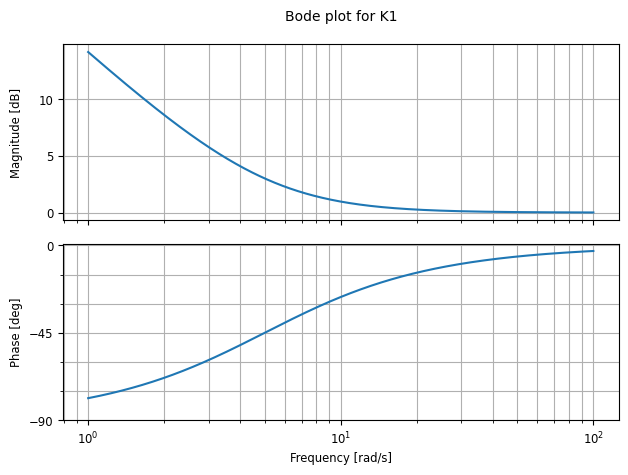

In [90]:
ct.bode(K1)